In [200]:
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [247]:
log_json = "./output/plots/00.2_dynCNN_reuse_optim_v0_cifar10_1_event_dict.json"
log_file = "./output/logs/00.2_dynCNN_reuse_optim_v0_log_1.txt"

# log_json = "./output/plots/00.2_dynCNN_reuse_optim_v0_cifar10_3_event_dict.json"
# log_file = "./output/logs/00.2_dynCNN_reuse_optim_v0_log_3.txt"

# log_json = "./output/plots/00.2_dynCNN_reuse_optim_v1_c100_cifar100_0_event_dict.json"
# log_file = "./output/logs/00.2_dynCNN_reuse_optim_v1_c100_log_0.txt"

In [248]:
with open(log_json, 'r') as fp:
    logs = json.load(fp)

In [249]:
logs.keys()

dict_keys(['train_accs', 'test_accs', 'event_dict'])

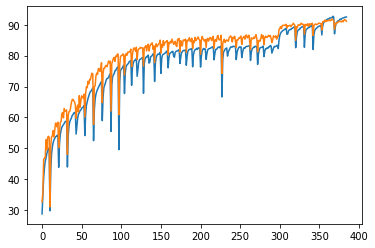

In [250]:
plt.plot(logs['train_accs'])
plt.plot(logs['test_accs'])

In [251]:
logs['event_dict']

[[0, 'neurons added'],
 [10, 'neurons pruned'],
 [11, 'neurons added'],
 [21, 'neurons pruned'],
 [22, 'neurons added'],
 [32, 'neurons pruned'],
 [33, 'neurons added'],
 [43, 'neurons pruned'],
 [44, 'neurons added'],
 [54, 'neurons pruned'],
 [55, 'neurons added'],
 [65, 'neurons pruned'],
 [66, 'neurons added'],
 [76, 'neurons pruned'],
 [77, 'neurons added'],
 [87, 'neurons pruned'],
 [88, 'neurons added'],
 [97, 'neurons pruned'],
 [98, 'neurons added'],
 [104, 'neurons pruned'],
 [105, 'neurons added'],
 [113, 'neurons pruned'],
 [114, 'neurons added'],
 [120, 'neurons pruned'],
 [121, 'neurons added'],
 [128, 'neurons pruned'],
 [129, 'neurons added'],
 [135, 'neurons pruned'],
 [136, 'neurons added'],
 [142, 'neurons pruned'],
 [143, 'neurons added'],
 [150, 'neurons pruned'],
 [151, 'neurons added'],
 [159, 'neurons pruned'],
 [160, 'neurons added'],
 [166, 'neurons pruned'],
 [167, 'neurons added'],
 [174, 'neurons pruned'],
 [175, 'neurons added'],
 [182, 'neurons pruned'],


## Load parameters and epoch from log file

In [252]:
epoch_param_acc = []

with open(log_file, 'r') as f:
#     line = f.readline()
    while True:
        line = f.readline()
        if line=="": break
            
        if not line.startswith('###'): continue
        ##### finds the first line of stats, extract epoch from here
#         print(line.split("|")[-1].strip().split(":")[1].strip())
        epoch = line.split("|")[-1].strip().split(":")[1].strip()
        
        line = f.readline()
#         print(line.split("|")[-1].strip().split(":")[1].strip())
        params = line.split("|")[-1].strip().split(":")[1].strip()
#         epoch_param[int(epoch)] = int(params)
        
        line = f.readline()
#         print(line.split("|")[-1].strip().split(":")[1].strip())
        acc = line.split("|")[-1].strip().split(":")[1].strip()
#         epoch_param[int(epoch)] = int(params)
        
    
        epoch_param_acc.append((int(epoch), int(params), float(acc)))

In [253]:
epoch_param_acc = np.array(epoch_param_acc)
epoch_param_acc

array([[1.000000e+01, 3.800500e+04, 5.362000e+01],
       [1.000000e+01, 2.197300e+04, 5.362000e+01],
       [2.100000e+01, 4.626300e+04, 5.850000e+01],
       [2.100000e+01, 2.784000e+04, 5.850000e+01],
       [3.200000e+01, 5.588400e+04, 6.243000e+01],
       [3.200000e+01, 3.548900e+04, 6.243000e+01],
       [4.300000e+01, 6.782300e+04, 6.402000e+01],
       [4.300000e+01, 4.269600e+04, 6.402000e+01],
       [5.400000e+01, 7.495900e+04, 6.754000e+01],
       [5.400000e+01, 5.253500e+04, 6.754000e+01],
       [6.500000e+01, 1.092770e+05, 7.408000e+01],
       [6.500000e+01, 7.081300e+04, 7.408000e+01],
       [7.600000e+01, 1.315220e+05, 7.769000e+01],
       [7.600000e+01, 9.011500e+04, 7.769000e+01],
       [8.700000e+01, 1.584740e+05, 7.820000e+01],
       [8.700000e+01, 1.088490e+05, 7.820000e+01],
       [9.700000e+01, 1.847470e+05, 8.045000e+01],
       [9.700000e+01, 1.226860e+05, 8.045000e+01],
       [1.040000e+02, 2.064250e+05, 8.040000e+01],
       [1.040000e+02, 1.466690e

## Plot param vs accuracy plot

In [254]:
####### CIFAR 10
### Resnet20 , wo Dropout, inplanes=11, --> (89.21, 'resnet_20_inplanes_11_params_129359.pth')
### Resnet20 , w Dropout, inplanes=11, --> (89.64, 'resnet20_inplanes_11_params_129359.pth')

### Resnet20, w Dropout, inplanes=21, 4 blocks --> (93.2, 'resnet20_b4_inplanes_21_params_1206691.pth')
### Resnet20, w Dropout, inplanes=21, 3 blocks --> (94.74, 'resnet20_inplanes_33_params_1153261.pth')

### Resnet20, w Dropout, inplanes=9, 4 blocks --> (87.87, 'resnet20_b4_inplanes_9_params_222967.pth')
### Resnet20, w Dropout, inplanes=13, 4 blocks --> (90.51, 'resnet20_b4_inplanes_13_params_463707.pth')
### Resnet20, w Dropout, inplanes=17, 4 blocks --> (92.25, 'resnet20_b4_inplanes_17_params_791615.pth')

In [255]:
max_val = np.max(logs['test_accs'])
max_idx = np.argmax(logs['test_accs'])
max_idx, max_val

(366, 91.85)

In [256]:
indx = np.nonzero(epoch_param_acc[:,0]>=max_idx)[0][0]

In [257]:
max_val_pam = epoch_param_acc[indx][1]
max_val_pam

1386580.0

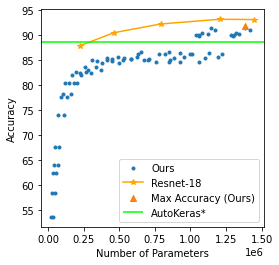

In [258]:
resnet_acc = [
    (1446917, 93.14),
    (1206691, 93.2),
    (791615, 92.25),
    (463707, 90.51),
    (222967, 87.87),
]
resnet_acc = np.array(resnet_acc)


# plt.figure(figsize=(6, 4)) ### this is default value
plt.figure(figsize=(4, 4))

# plt.plot(epoch_param_acc[:,1], epoch_param_acc[:,2], marker='.')
plt.scatter(epoch_param_acc[:,1], epoch_param_acc[:,2], marker='.', label="Ours")

plt.plot(resnet_acc[:,0], resnet_acc[:,1], marker='*', color='orange', label="Resnet-18")
# plt.scatter(resnet_acc[:,0], resnet_acc[:,1], marker='*', label="Resnet-18")
plt.scatter([max_val_pam], [max_val], marker='^', label="Max Accuracy (Ours)")

### autokeras
cur_xlim = plt.xlim()
plt.hlines(88.56, cur_xlim[0], cur_xlim[1], color='lime', label="AutoKeras*")
plt.xlim(cur_xlim)
# plt.xscale('log')
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("./params_vs_acc_c10.pdf")
plt.show()

In [259]:
epoch_param_acc[:,1].max()

1415806.0

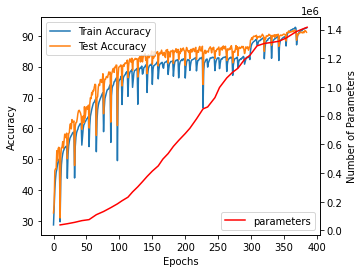

In [260]:
# plt.figure(figsize=(6, 4))
plt.figure(figsize=(5, 4))

h0 = plt.plot(logs['train_accs'], label="Train Accuracy")
h1 = plt.plot(logs['test_accs'], label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=2)
ax = plt.gca()

### plot epoch vs parameters as well
ax2 = ax.twinx() 
h2 = ax2.plot(epoch_param_acc[::2,0], epoch_param_acc[::2,1], c='r', label="parameters")
ax2.set_ylabel("Number of Parameters")
ax2.legend(loc=4)

plt.savefig("./steps_vs_acc_c10.pdf")
plt.show()

(-49274.6725, 1518164.2225)

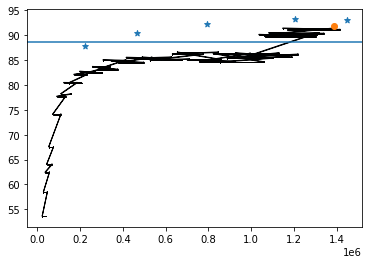

In [261]:
### plot arrows:
for i in range(len(epoch_param_acc)-1):
    x0, y0 = epoch_param_acc[i, 1], epoch_param_acc[i, 2]
    x1, y1 = epoch_param_acc[i+1, 1], epoch_param_acc[i+1, 2]
    plt.arrow(x0, y0, x1-x0, y1-y0, width=0.1)

# x = 
# y = 
# u = 
# v = 
# plt.quiver()


# plt.plot(epoch_param_acc[:,1], epoch_param_acc[:,2], marker='.')
# plt.scatter(epoch_param_acc[:,1], epoch_param_acc[:,2], marker='.')

plt.scatter(resnet_acc[:,0], resnet_acc[:,1], marker='*')
plt.scatter([max_val_pam], [max_val], marker='o')

### autokeras
cur_xlim = plt.xlim()
plt.hlines(88.56, cur_xlim[0], cur_xlim[1])
plt.xlim(cur_xlim)
# plt.xscale('log')

## Read Meta-Parameters

In [262]:
morph_meta_params = []

meta_keys = ["num_add_neuron", "add_to_remove_ratio", "learning_rate", "num_decay_steps",\
                "threshold_max", "threshold_min", "train_epoch_min", "threshold_max"]

with open(log_file, 'r') as f:
#     line = f.readline()
    while True:
#     for i in range(100):
        line = f.readline()
        if line=="": break
            
        if not line.startswith('━━━━━━━━━━━━━━━━━━━'): continue
        line = f.readline()
        if not line.startswith('━━━━━━━━━━━━━━━━━━━'): continue
            
        
        values = []
        for key in meta_keys:
            line = f.readline()
            val = line.split(f'{key} :')[-1].strip()
            values.append(val)

#         print(keys, values)

#         line = f.readline()
#         add_rm_ratio = float(line.split('num_add_neuron :')[-1].strip())
        
#         line = f.readline()
#         add_rm_ratio = float(line.split('num_decay_steps :')[-1].strip())
        
        
        
        
        ##### finds the first line of stats, extract epoch from here
#         epoch = line.split("|")[-1].strip().split(":")[1].strip()

#         line = f.readline()
#         params = line.split("|")[-1].strip().split(":")[1].strip()
        
#         line = f.readline()
#         acc = line.split("|")[-1].strip().split(":")[1].strip()
#         print(line.split("|"))
#         print(f.readline())
#         print(f.readline())
#         print(f.readline())
        
        
        morph_meta_params.append(
        (int(values[0]), float(values[1]), float(values[2]), float(values[3]), 
         float(values[4]), float(values[5]), float(values[6]), float(values[7]), )
        )

In [263]:
len(morph_meta_params), len(epoch_param_acc) ### same values == 1to1 mapping

(80, 80)

In [264]:
morph_meta_params

[(50, 1.7, 0.001, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (50, 1.7, 0.001, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (50, 1.7, 0.001, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (50, 1.7, 0.001, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (50, 1.7, 0.001, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (50, 1.7, 0.001, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (50, 1.7, 0.001, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (50, 1.7, 0.001, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (50, 1.7, 0.001, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0, 0.0005, 4689.0, 0.5, 0.01, 1.0, 10.0),
 (80, 2.0

In [265]:
morph_meta_params = np.array(morph_meta_params)

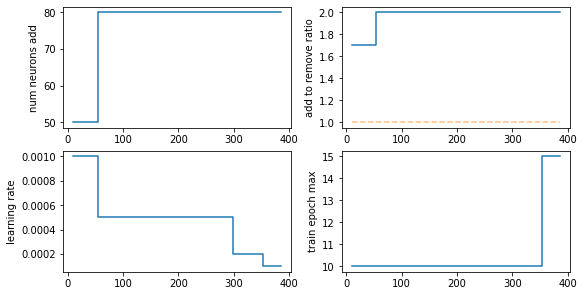

In [266]:
### Plotting meta parameters
# plt.figure(figsize=(8, 6))
fig, axes = plt.subplots(2,2, figsize=(8, 4), constrained_layout=True)
(ax00, ax01), (ax10, ax11) = axes


# ax00 = plt.subplot(221)
epochs = epoch_param_acc[:,0]
num_add = morph_meta_params[:, 0]
ax00.plot(epochs, num_add)
ax00.set_ylabel("num neurons add")
# plt.show()

# ax01 = plt.subplot(222)
add2rem = morph_meta_params[:,1]
ax01.plot(epochs, add2rem)
ax01.plot(epochs, add2rem*0+1, linestyle='dashed', alpha=0.5) ## plotting straight line
ax01.set_ylabel("add to remove ratio")
# plt.show()

# ax10 = plt.subplot(223)
lr = morph_meta_params[:,2]
ax10.plot(epochs, lr)
ax10.set_ylabel("learning rate")
# plt.show()

# ax11 = plt.subplot(224)
trmax = morph_meta_params[:,7]
ax11.plot(epochs, trmax)
ax11.set_ylabel("train epoch max")

plt.savefig("./meta-params_c10.pdf", bbox_inches='tight')
plt.show()

In [166]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:ylabel='train epoch max'>]],
      dtype=object)